In [9]:
import torch
import torch.nn as nn
import numpy as np
from torch.optim import optimizer
from sklearn import datasets
import matplotlib.pyplot as plt

In [10]:
# 0) prepare data
feature_numpy, target_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1234)

feature = torch.from_numpy(feature_numpy.astype(np.float32))
target = torch.from_numpy(target_numpy.astype(np.float32))
target = target.view(target.shape[0], 1)

n_samples, n_features = feature.shape

In [13]:
# 1) model
class LinearRegression(nn.Module):
    
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        
        # define layers
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
    
        return self.linear(x)

model = LinearRegression(n_features, 1)

In [14]:
# 2) loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [15]:
# 3) training loop
epochs = 100
for epoch in range(epochs):
    # forward pass and loss
    y_predicted = model(feature)
    loss = criterion(y_predicted, target)

    # backward pass
    loss.backward()

    # update
    optimizer.step()
    
    # init optimizer
    optimizer.zero_grad()

    if (epoch + 1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item(): .4f}')

epoch: 10, loss =  5655.4438
epoch: 20, loss =  3890.4956
epoch: 30, loss =  2709.5068
epoch: 40, loss =  1919.1025
epoch: 50, loss =  1389.9967
epoch: 60, loss =  1035.7345
epoch: 70, loss =  798.4895
epoch: 80, loss =  639.5772
epoch: 90, loss =  533.1120
epoch: 100, loss =  461.7703


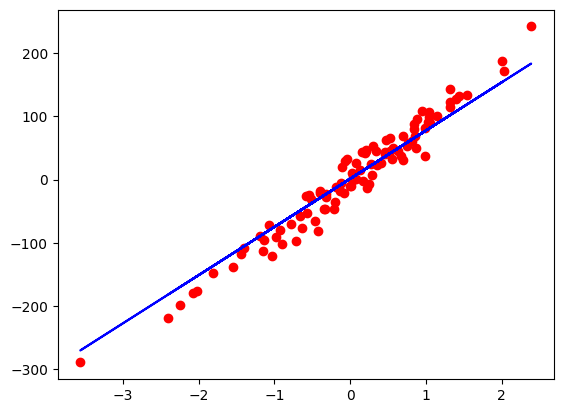

In [16]:
# show in image
predicted = model(feature).detach().numpy()
plt.plot(feature_numpy, target_numpy, 'ro')
plt.plot(feature_numpy, predicted, 'b')
plt.show()